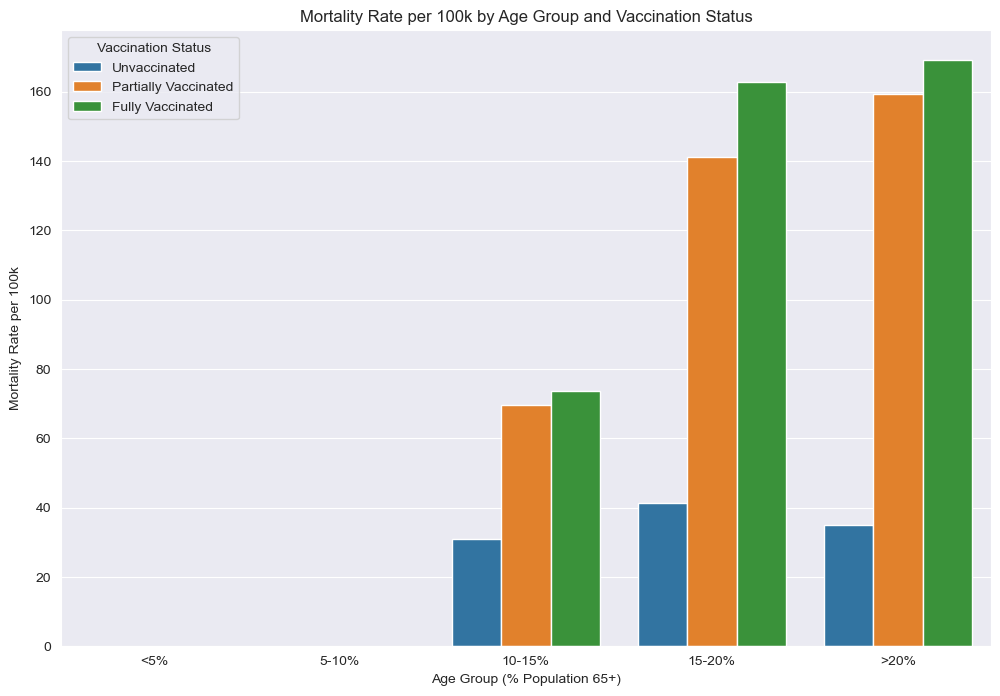

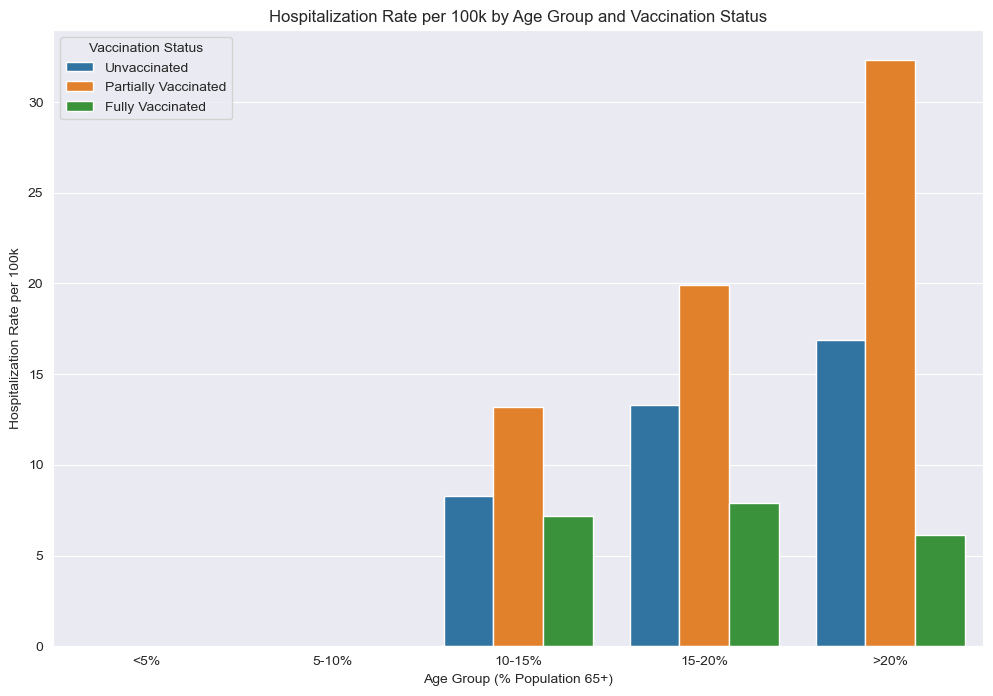

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# path to data file
covid_data = pd.read_csv('covid-data.csv')

# Calculate hospitalization rate per 100,000 population
covid_data['hospitalization_rate_per_100k'] = (covid_data['hosp_patients'] / covid_data['population']) * 100000

# Calculate mortality rate per 100,000 population
covid_data['mortality_rate_per_100k'] = (covid_data['total_deaths'] / covid_data['population']) * 100000

# Create age group categories using the 'aged_65_older' column as a proxy for older population demographics
covid_data['age_group'] = pd.cut(
    covid_data['aged_65_older'], 
    bins=[0, 5, 10, 15, 20, 100], 
    labels=['<5%', '5-10%', '10-15%', '15-20%', '>20%'], 
    include_lowest=True
)

# Create vaccination status categories based on vaccination data as a percentage of the population
covid_data['vaccination_status'] = pd.cut(
    covid_data['people_fully_vaccinated'] / covid_data['population'] * 100, 
    bins=[-1, 0, 50, 100], 
    labels=['Unvaccinated', 'Partially Vaccinated', 'Fully Vaccinated'], 
    include_lowest=True
)

#Fill missing values for 'vaccination_status' explicitly as 'Unvaccinated' if there's no vaccination data
covid_data['vaccination_status'] = covid_data['vaccination_status'].fillna('Unvaccinated')


# Selecting only the necessary columns for further analysis
impact_data = covid_data[
    ['hospitalization_rate_per_100k', 'mortality_rate_per_100k', 'age_group', 'vaccination_status']
].dropna()  # Drop rows with missing data in critical fields


# Ensure that seaborn styles are available
sns.set_style("darkgrid")

# Prepare the data (assuming impact_data is already prepared)
# Drop rows with missing values in critical fields for clear visualization
viz_data = impact_data.dropna(subset=['age_group', 'vaccination_status', 
                                      'hospitalization_rate_per_100k', 'mortality_rate_per_100k'])

# Set the order of age groups for consistency
age_order = ['<5%', '5-10%', '10-15%', '15-20%', '>20%']

# Plot Mortality Rate by Age Group and Vaccination Status using Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=viz_data,
    x='age_group',
    y='mortality_rate_per_100k',
    hue='vaccination_status',
    order=age_order,
    errorbar=None  # Replaces ci=None
)
plt.title("Mortality Rate per 100k by Age Group and Vaccination Status")
plt.xlabel("Age Group (% Population 65+)")
plt.ylabel("Mortality Rate per 100k")
plt.legend(title='Vaccination Status')
plt.show()

# Plot Hospitalization Rate by Age Group and Vaccination Status using Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=viz_data,
    x='age_group',
    y='hospitalization_rate_per_100k',
    hue='vaccination_status',
    order=age_order,
    errorbar=None  # Replaces ci=None
)
plt.title("Hospitalization Rate per 100k by Age Group and Vaccination Status")
plt.xlabel("Age Group (% Population 65+)")
plt.ylabel("Hospitalization Rate per 100k")
plt.legend(title='Vaccination Status')
plt.show()
